In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

Processing c:\users\user\downloads\ta_lib-0.4.19-cp38-cp38-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 크롤링 start_date, end_date
start_date='2019-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2021-01-13'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

In [8]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [9]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# 미국 국채 수익률 (10년)
treasury_10y_ = yf.download("^TNX", start=start_date, end=end_date)
treasury_10y_.columns = ['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Close','treasury_10y_Adj Close','treasury_10y_Volume']
treasury_10y_ = treasury_10y_.drop(['treasury_10y_Open','treasury_10y_High','treasury_10y_Low','treasury_10y_Adj Close','treasury_10y_Volume'], axis=1)

# 미국 국채 수익률 (30년)
treasury_30y_ = yf.download("^TYX", start=start_date, end=end_date)
treasury_30y_.columns = ['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Close','treasury_30y_Adj Close','treasury_30y_Volume']
treasury_30y_ = treasury_30y_.drop(['treasury_30y_Open','treasury_30y_High','treasury_30y_Low','treasury_30y_Adj Close','treasury_30y_Volume'], axis=1)

# [*에너지*]
# WTI유 시세
crude_oil_ = yf.download("CL=F", start=start_date, end=end_date)
crude_oil_.columns = ['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Close','crude_oil_Adj Close','crude_oil_Volume']
crude_oil_ = crude_oil_.drop(['crude_oil_Open','crude_oil_High','crude_oil_Low','crude_oil_Adj Close','crude_oil_Volume'], axis=1)

# 브렌트유 시세
brent_crude_oil_ = yf.download("BZ=F", start=start_date, end=end_date)
brent_crude_oil_.columns = ['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Close','brent_crude_oil_Adj Close','brent_crude_oil_Volume']
brent_crude_oil_ = brent_crude_oil_.drop(['brent_crude_oil_Open','brent_crude_oil_High','brent_crude_oil_Low','brent_crude_oil_Adj Close','brent_crude_oil_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [11]:
# SMH 인텔(10%), TSMC(10%), 엔비디아(5%)
SMH = yf.download("SMH", start=start_date, end=end_date)
SMH.columns = ['SMH_Open','SMH_High','SMH_Low','SMH_Close','SMH_Adj Close','SMH_Volume']
SMH = SMH.drop(['SMH_Open','SMH_High','SMH_Low','SMH_Close','SMH_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [12]:
# SOXL 지수(3배 상승 레버리지) 텍사스인스트루먼트(8.6%) 인텔(8.3%), 퀄컴(7.8%), 엔비디아(7.8%)
SOXL = yf.download("SOXL", start=start_date, end=end_date)
SOXL.columns = ['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Adj Close','SOXL_Volume']
SOXL = SOXL.drop(['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [13]:
# SOXS 지수(3배 인버스 레버리지) 텍사스인스트루먼트(8.6%) 인텔(8.3%), 퀄컴(7.8%), 엔비디아(7.8%)
SOXS = yf.download("SOXS", start=start_date, end=end_date)
SOXS.columns = ['SOXS_Open','SOXS_High','SOXS_Low','SOXS_Close','SOXS_Adj Close','SOXS_Volume']
SOXS = SOXS.drop(['SOXS_Open','SOXS_High','SOXS_Low','SOXS_Close','SOXS_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [14]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOXX'] = SOXX
model_samsung['SMH'] = SMH
model_samsung['SOXL'] = SOXL
model_samsung['SOXS'] = SOXS
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['TREASURY_10Y']=treasury_10y_
model_samsung['TREASURY_30Y']=treasury_30y_
#model_samsung['crude_oil'] = crude_oil_
#model_samsung['brent_crude_oil'] = brent_crude_oil_
model_samsung['hang_seng'] = hang_seng_


In [15]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [16]:
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [17]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close      macd  macdsignal9  macdhist        US    SNP500  \
2019-02-21  0.115462  0.629326     0.732701  0.373441  0.222199  0.338617   
2019-02-22  0.119478  0.623215     0.721324  0.384812  0.208265  0.349825   
2019-02-25  0.123494  0.617867     0.710871  0.396312  0.171689  0.351992   
2019-02-26  0.111446  0.605980     0.699503  0.384923  0.169314  0.350600   
2019-02-27  0.111446  0.594503     0.687507  0.377105  0.183090  0.349642   

            RUSSELL2000    NASDAQ   MSCI_KR      SOXX       SMH      SOXL  \
2019-02-21     0.514066  0.094466  0.305150  0.030649  0.032407  0.122720   
2019-02-22     0.526830  0.105163  0.311096  0.039262  0.042692  0.130505   
2019-02-25     0.525730  0.109408  0.312320  0.045951  0.049385  0.136970   
2019-02-26     0.515764  0.108594  0.308035  0.040836  0.044594  0.131511   
2019-02-27     0.518904  0.109416  0.309784  0.031086  0.037056  0.122385   

                SOXS  TREASURY_5Y  TREASURY_10Y  TREASURY_30Y  hang_seng  

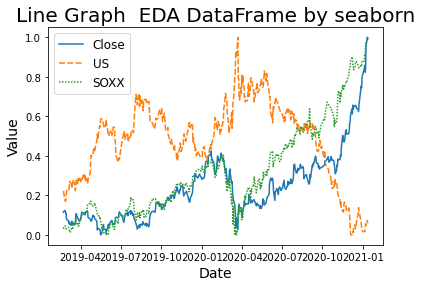

In [18]:
# Importing Libraries
##삼성주가와 환율, 반도체 지수 비교 : SOXX 지수는 비례 관계, 환율은 반비례
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'US', 'SOXX']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

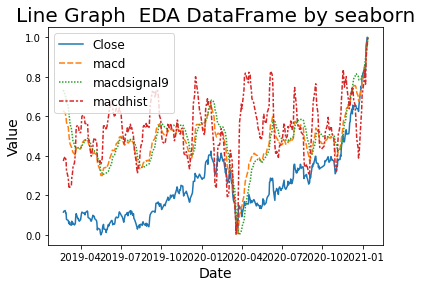

In [19]:
# Importing Libraries  MACD 지수 macdhist 제거, macdsignal9 제거 필요
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'macd', 'macdsignal9','macdhist']])  #'macdhist'

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

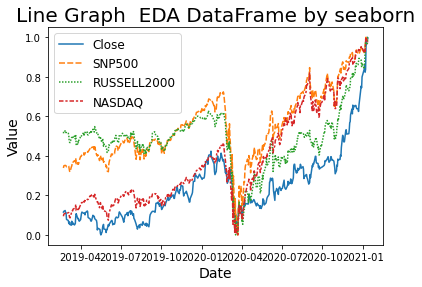

In [20]:
# Importing Libraries ## SNP 500 지수만 필요, 러셀2000 지수와 SOXX 지수와 매우 비슷
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'SNP500', 'RUSSELL2000', 'NASDAQ']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [21]:
## 러셀 지수를 5일, 10일 전으로 shift 필요

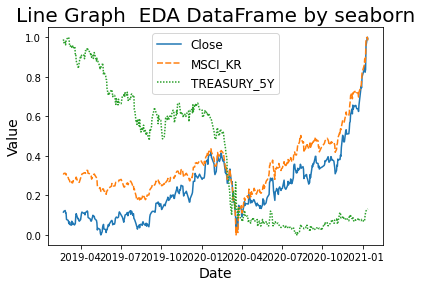

In [22]:
# Importing Libraries MSCI 는 SOXX 와 비슷해서 제거 필요 미국채 5년 수익률 자료 필요
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'MSCI_KR', 'TREASURY_5Y']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

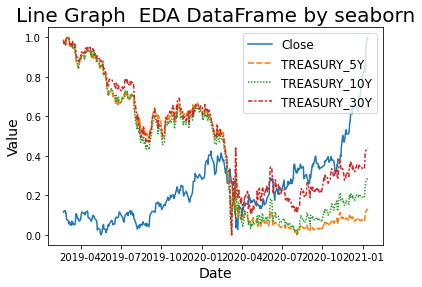

In [23]:
# Importing Libraries 미국채 5년 데이터가 제일 상관관계 높음
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close','TREASURY_5Y','TREASURY_10Y','TREASURY_30Y']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

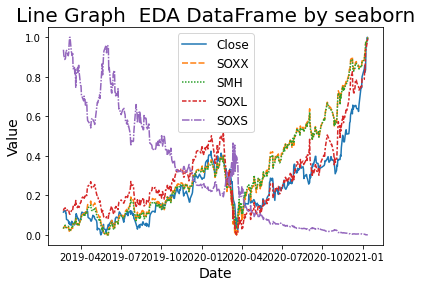

In [24]:
# Importing Libraries SOXS 지표와 SOXL 지표가 의미 있음..
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close','SOXX','SMH','SOXL','SOXS']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

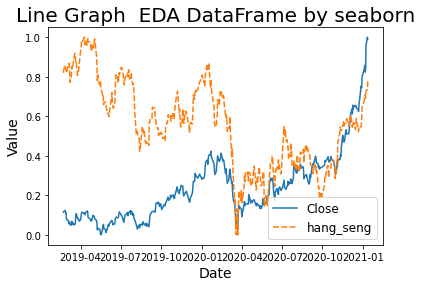

In [25]:
# Importing Libraries SOXS 지표와 SOXL 지표가 의미 있음..
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close','hang_seng']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

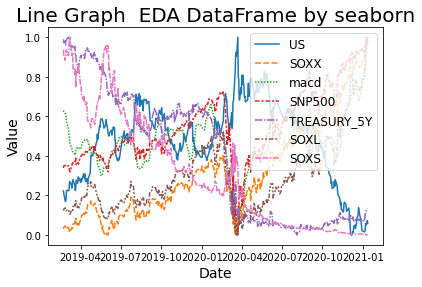

In [26]:
# Importing Libraries SOXS 지표와 SOXL 지표가 의미 있음..
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['US', 'SOXX', 'macd', 'SNP500', 'TREASURY_5Y', 'SOXL','SOXS']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [27]:
output

,Close,macd,macdsignal9,macdhist,US,SNP500,RUSSELL2000,NASDAQ,MSCI_KR,SOXX,SMH,SOXL,SOXS,TREASURY_5Y,TREASURY_10Y,TREASURY_30Y,hang_seng
2019-02-21,0.115462,0.629326,0.732701,0.373441,0.222199,0.338617,0.514066,0.094466,0.305150,0.030649,0.032407,0.122720,0.936769,0.989307,0.984705,0.979099,0.819465
2019-02-22,0.119478,0.623215,0.721324,0.384812,0.208265,0.349825,0.526830,0.105163,0.311096,0.039262,0.042692,0.130505,0.907683,0.972198,0.969861,0.967487,0.841492
2019-02-25,0.123494,0.617867,0.710871,0.396312,0.171689,0.351992,0.525730,0.109408,0.312320,0.045951,0.049385,0.136970,0.883655,0.979897,0.977958,0.973990,0.858393
2019-02-26,0.111446,0.605980,0.699503,0.384923,0.169314,0.350600,0.515764,0.108594,0.308035,0.040836,0.044594,0.131511,0.901360,0.961506,0.961314,0.960985,0.836264
2019-02-27,0.111446,0.594503,0.687507,0.377105,0.183090,0.349642,0.518904,0.109416,0.309784,0.031086,0.037056,0.122385,0.935504,0.981608,0.986955,0.990246,0.834536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,0.823293,0.851751,0.877584,0.797702,0.023223,0.951779,0.938388,0.927272,0.868410,0.907398,0.907330,0.832811,0.002983,0.101369,0.244265,0.410590,0.708653
2021-01-07,0.837349,0.857885,0.896556,0.762776,0.056737,0.986839,0.972669,0.978790,0.906444,0.970750,0.973286,0.938563,0.000909,0.110778,0.257310,0.421737,0.691661
2021-01-08,0.955823,0.910748,0.925097,0.881957,0.049612,1.000000,0.968068,1.000000,0.994317,0.971668,0.967310,0.939457,0.000866,0.121471,0.272605,0.430098,0.730626
2021-01-11,1.000000,0.966325,0.961980,0.985847,0.072307,0.984206,0.967497,0.973893,1.000000,0.989332,0.992151,0.978289,0.000331,0.129598,0.284750,0.436136,0.734172


In [28]:
fit_model = output.drop(['macdsignal9', 'macdhist', 'RUSSELL2000', 'NASDAQ', 'MSCI_KR', 'SMH','TREASURY_10Y','TREASURY_30Y'],axis=1,inplace=True)
#fit_model = output.drop(['US', 'SOXX', 'macd', 'SNP500', 'TREASURY_5Y', 'SOXL','SOXS'],axis=1,inplace=True)

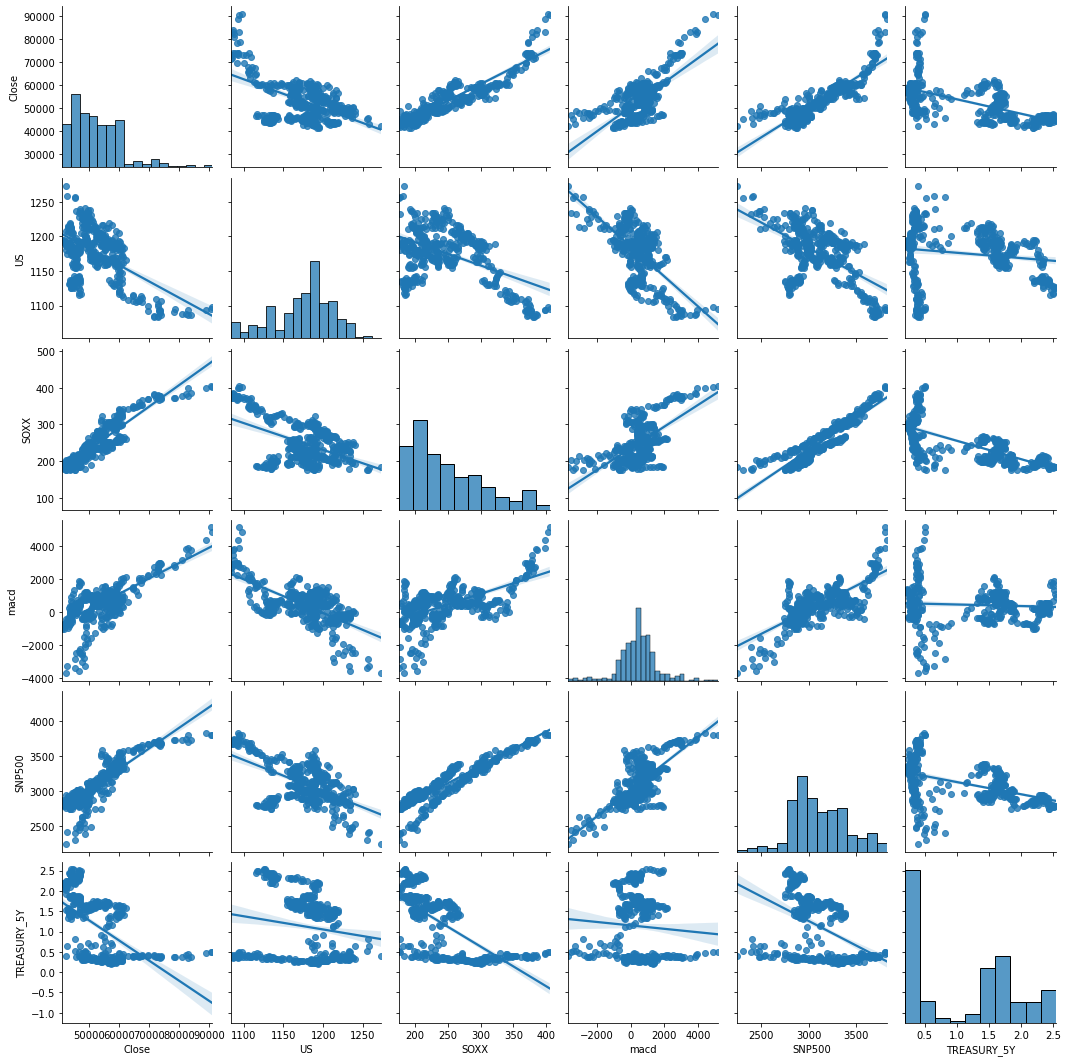

In [29]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung[['Close','US', 'SOXX', 'macd', 'SNP500', 'TREASURY_5Y']], kind='reg')

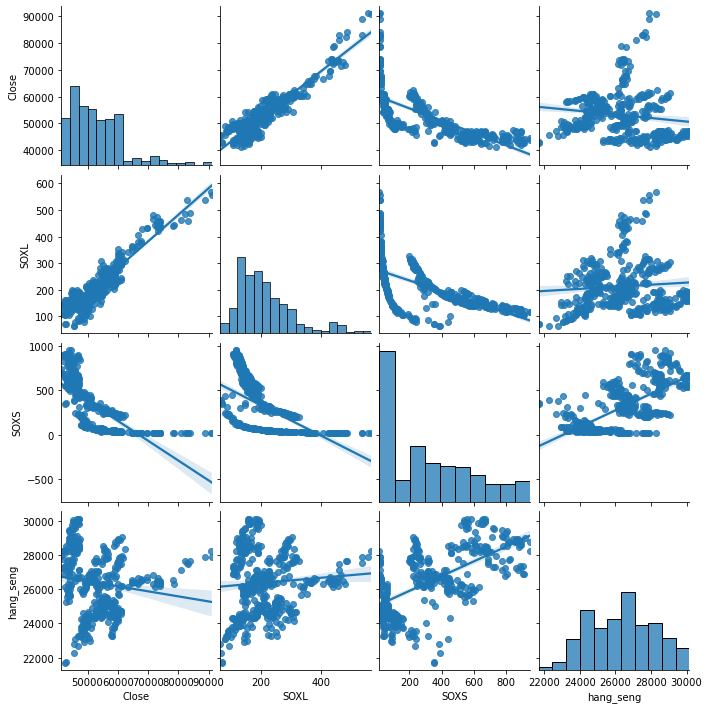

In [30]:
sns.pairplot(model_samsung[['Close','SOXL','SOXS','hang_seng']], kind='reg')

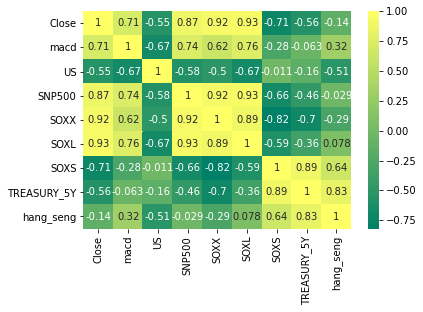

In [33]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')